In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
def cpm_periodogram(fits_file, t_row=50, t_col=50):
    cpm = tess_cpm.CPM(fits_file, remove_bad=True)
    cpm.set_target(t_row, t_col)
    cpm.set_exclusion(10)
    cpm.set_predictor_pixels(256, method='cosine_similarity')
    cpm.lsq(0.1, rescale=True, polynomials=False)
    tess_cpm.summary_plot(cpm, 10)
    aperture_lc, lc_matrix = cpm.get_aperture_lc(box=2, show_pixel_lc=True, show_aperture_lc=True)
#     lc = lk.LightCurve(time=cpm.time, flux=aperture_lc)
#     pg = lc.to_periodogram(oversample_factor=10)
#     fig, axs = plt.subplots(2, 1, figsize=(15, 8))
#     pg.plot(ax=axs[0], c='k')
#     pg.plot(ax=axs[1], c='k', view='period')
#     fig.suptitle("Periodogram", fontsize=20, y=0.95)
#     period = pg.period_at_max_power
#     print(f"Max Power Period: {period}")
#     lc.fold(period.value*4).scatter()
#     plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)
    return cpm

In [3]:
fits_file = "supernovae/tess-s0001-4-1_64.525833_-63.615669_100x100_astrocut.fits"

Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad data points (out of 1282) using the TESS provided "QUALITY" array
Removing 15 bad 

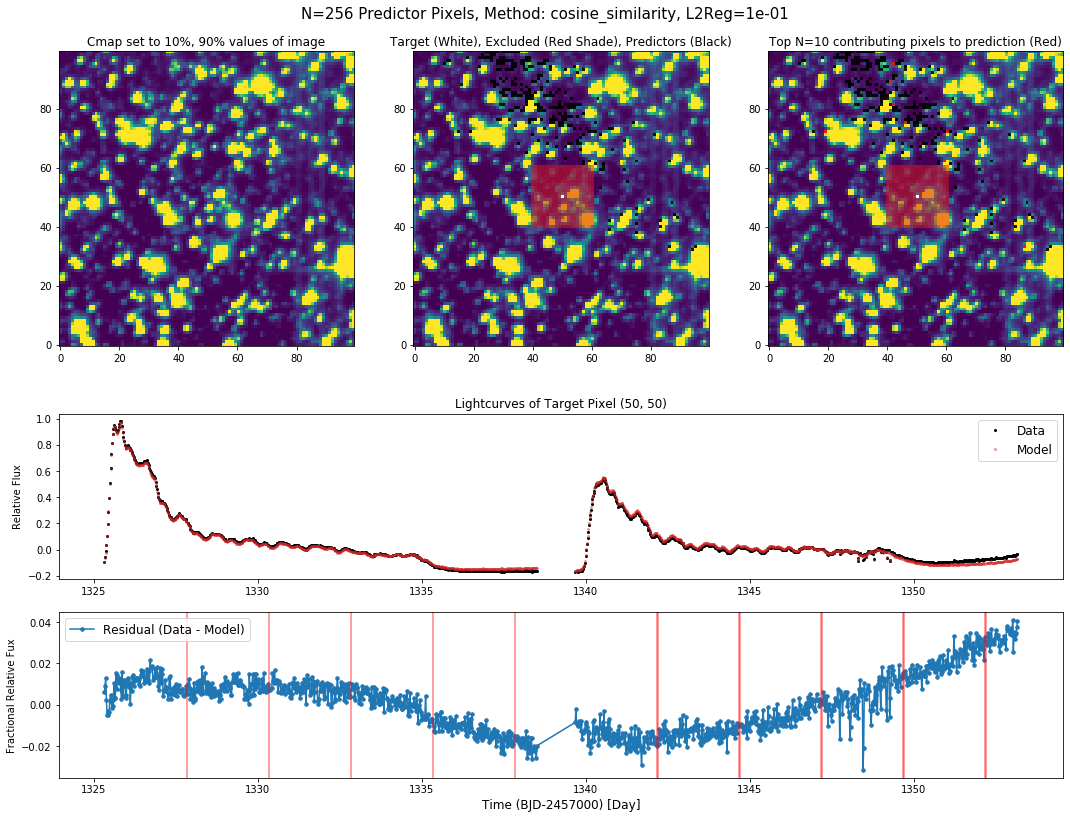

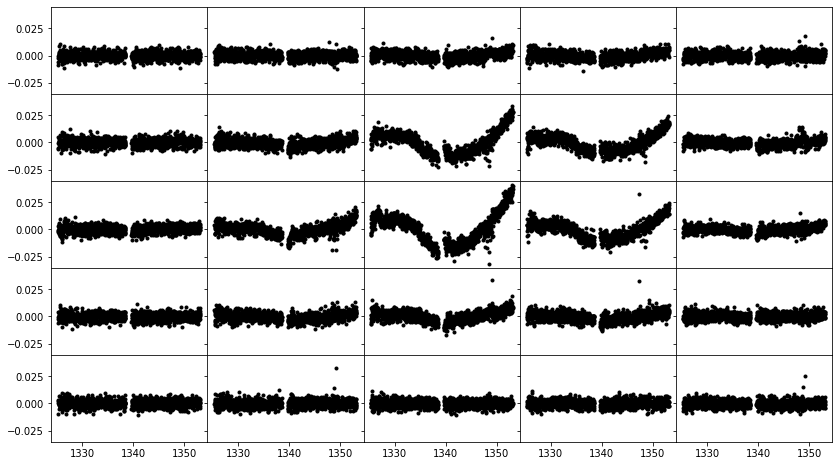

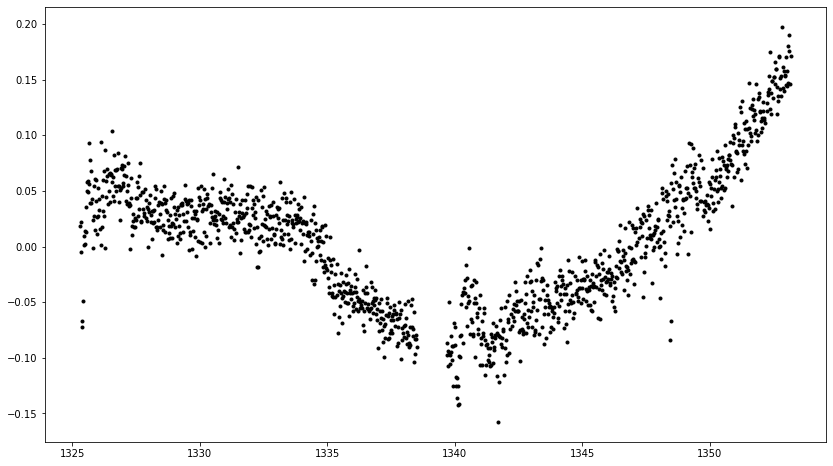

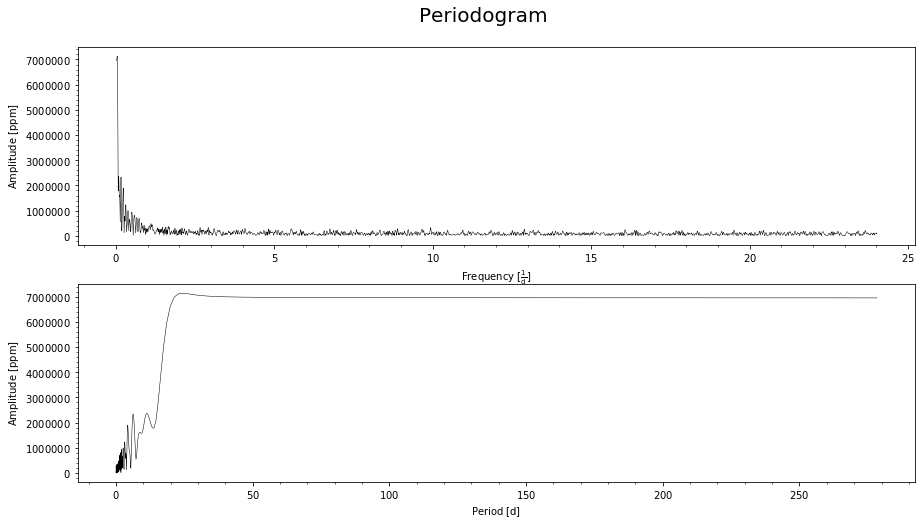

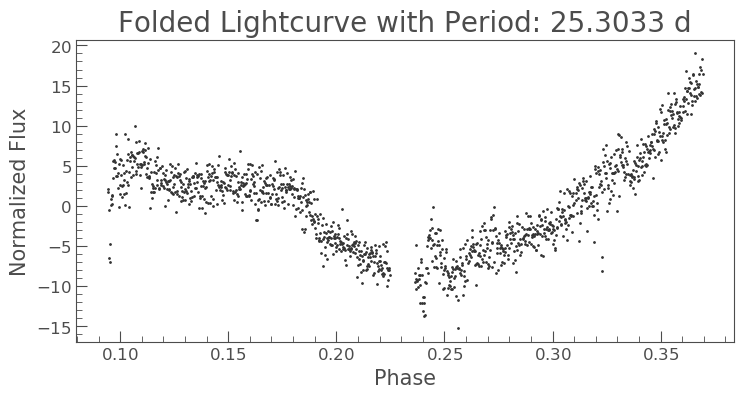

In [7]:
cpm_periodogram(fits_file)
# sn = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
sn.set_poly_model(1, 4, 2)
sn.set_target(50, 50)
sn.set_exclusion(10)
sn.set_predictor_pixels(256*4, method='cosine_similarity')

In [ ]:
sn.lsq(0.1, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(sn, 20, subtract_polynomials=False, save=False)

In [ ]:
sn.get_aperture_lc(show_pixel_lc=True, show_aperture_lc=True)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(sn.time, sn.rescaled_target_fluxes, '.')
n = 10
# locs, mask = c.get_contributing_pixels(n)
# print(c.rescaled_predictor_pixels_fluxes.shape)
# print(locs[2])
# plt.plot(c.time, c.rescaled_im_fluxes[:, locs[0][0], locs[0][1]], '-')
# plt.plot(c.time, c.rescaled_predictor_pixels_fluxes[:, 4])
for i in range(n):
    plt.figure(figsize=(12, 8))
    t = sn.rescaled_target_fluxes
    p = sn.rescaled_predictor_pixels_fluxes[:, i]
    plt.plot(sn.time, t, '.')
    plt.plot(sn.time, p, '-', alpha=0.4)
    plt.title(np.dot(p, t)/(np.linalg.norm(p)*np.linalg.norm(t)), fontsize=25)
    plt.show();

In [ ]:
fits_file = "supernovae/tess-s0002-4-1_64.525833_-63.615669_100x100_astrocut.fits"

In [ ]:
sector2 = tess_cpm.CPM(fits_file, remove_bad=False)

In [ ]:
sector2.set_poly_model(2, 4, 0.5)
sector2.set_target(50, 50)
sector2.set_exclusion(10)
# sector2.set_predictor_pixels(256)
sector2.set_predictor_pixels(256, method='cosine_similarity')

In [ ]:
sector2.lsq(0.1, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(sector2, 20, subtract_polynomials=False, save=False)

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
prediction, residual = sn.xval(0.1)

In [5]:
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
s = tess_cpm.Source(fits_file)
pm = tess_cpm.PixelModel(s.target_data, 50, 50)

WCS Info could not be retrieved
Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array


In [7]:
pm.add_cpm_model()
pm.add_poly_model()
pm.set_regs([1.0, 5.0])

Setting CPM's regularization to 1.0
Setting PolyModel's regularization to 5.0


1267


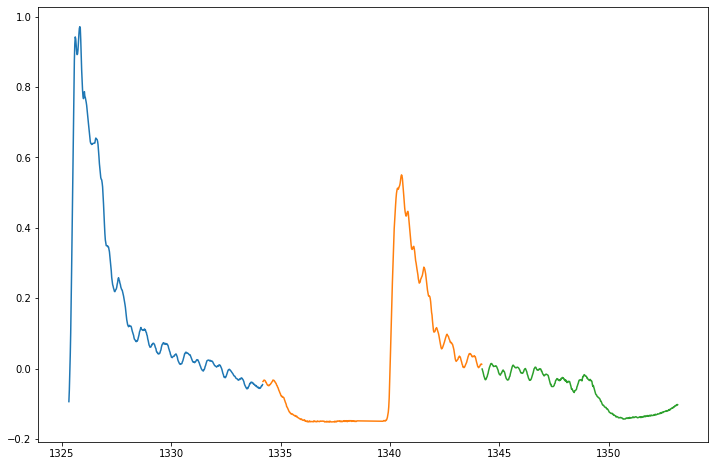

In [32]:
print(pm.time.size)
times, predictions = pm.holdout_predictions(k=3)
for time, prediction in zip(times, predictions):
    plt.plot(time, prediction)

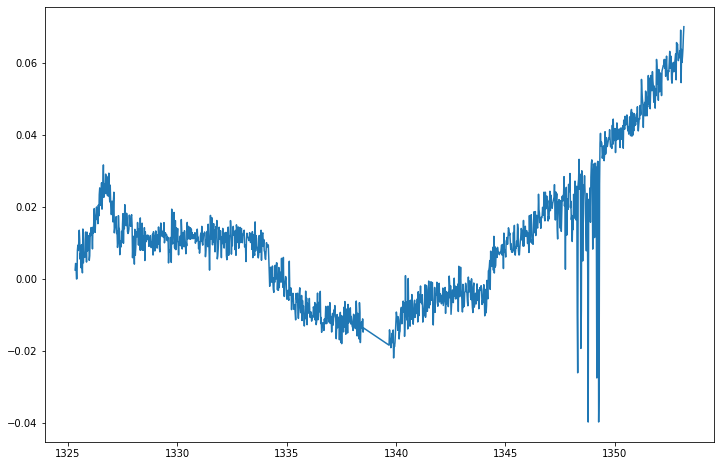

In [33]:
p = np.concatenate(predictions)
# plt.plot(pm.time, p)
plt.plot(pm.time, pm.y-p)

In [61]:
pm.fit(save=True)
prediction = pm.predict()
cpm_prediction = pm.cpm.predict()

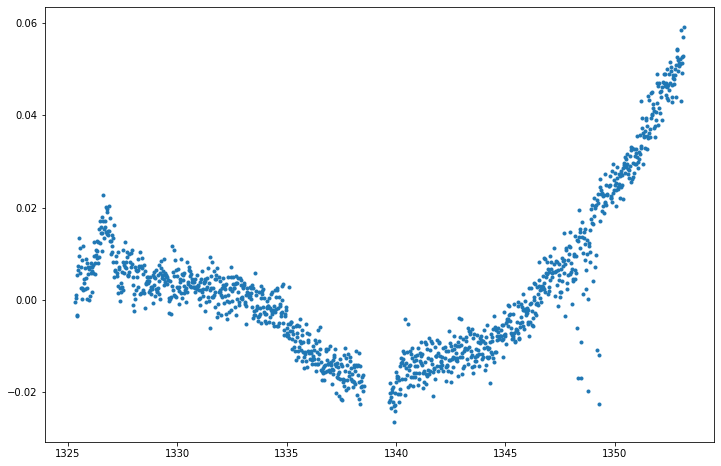

In [62]:
plt.plot(pm.time, pm.y - cpm_prediction, ".")
# plt.plot(pm.time, pm.poly_model.predict(), '.')